# Résultats des requêtes du TP "movies"

In [8]:
%reload_ext sql
%reload_ext mocodo
%config SqlMagic.displaylimit = 30 # limite dans le nombre de tuples du résultat
%config SqlMagic.dsn_filename = "connexion_BD.ini" 
# ajouter ou changer ce fichier pour définir sa connexion. Le fichier doit être de la forme
# [pg]
# drivername = postgresql # pour psycopg2
# username = 
# password = 
# host = 
# port = 5432
# database = [login étudiant]
%sql --section pg 
#initialise la connection en utilisant la connexion [pg] définie dans le fichier

Mocodo 4.2.2 loaded.


Connecting to 'pg'

## Création du schéma

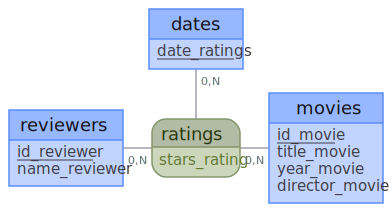

In [9]:
%%mocodo --select mcd -t arrange --svg_to pdf --colors ocean
movies: id_movie [integer] ,title_movie, year_movie [integer], director_movie
reviewers : id_reviewer [integer], name_reviewer
dates : date_ratings [date]

ratings, 0N movies, 0N reviewers, 0N dates : stars_rating

In [10]:
%mocodo -i mocodo_notebook/sandbox -t mld


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
mocodo_notebook/sandbox_mld.md
</tt>
</span>
</div>


- **movies** (<ins>id_movie</ins>, title_movie, year_movie, director_movie)
- **ratings** (<ins>_#id_movie_</ins>, <ins>_#id_reviewer_</ins>, <ins>date_ratings</ins>, stars_rating)
- **reviewers** (<ins>id_reviewer</ins>, name_reviewer)


In [11]:
%mocodo -i mocodo_notebook/sandbox --select sql -t postgresql create:types=text


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
mocodo_notebook/sandbox_ddl_postgresql.sql
</tt>
</span>
</div>


```sql
CREATE TABLE movies (
  PRIMARY KEY (id_movie),
  id_movie       integer NOT NULL,
  title_movie    text,
  year_movie     integer,
  director_movie text
);

CREATE TABLE ratings (
  PRIMARY KEY (id_movie, id_reviewer, date_ratings),
  id_movie     integer NOT NULL,
  id_reviewer  integer NOT NULL,
  date_ratings date NOT NULL,
  stars_rating text
);

CREATE TABLE reviewers (
  PRIMARY KEY (id_reviewer),
  id_reviewer   integer NOT NULL,
  name_reviewer text
);

ALTER TABLE ratings ADD FOREIGN KEY (id_reviewer) REFERENCES reviewers (id_reviewer);
ALTER TABLE ratings ADD FOREIGN KEY (id_movie) REFERENCES movies (id_movie);

```

In [12]:
%%sql
drop schema if exists cinema cascade;
create schema cinema;
set search_path to cinema, "$user", public;

create table reviewers (
  id_reviewer integer,
  name_reviewer text not null,

  primary key (id_reviewer)
);

create table movies (
  id_movie integer,
  title_movie text not null,
  year_movie integer not null,
  director_movie text,

  primary key(id_movie)
);

create table ratings (
  id_reviewer integer,
  id_movie integer,
  stars_rating integer not null check (stars_rating between 1 and 5),
  date_rating date,

  primary key (id_reviewer, id_movie, date_rating),
  foreign key (id_reviewer) references reviewers, 
  foreign key (id_movie) references movies
);

alter table movies add constraint uk_title_year unique (title_movie, year_movie);


Running query in 'pg'

++
||
++
++

In [13]:
## Insertion des tuples

In [14]:
%%sql


insert into movies(id_movie, title_movie, year_movie, director_movie) values
    (101, 'Gone with the Wind', 1939, 'Victor Fleming'),
    (102, 'Star Wars', 1977, 'George Lucas'),
    (109, 'Star Wars', 1980, 'Georges Lucas'),
    (103, 'The Sound of Music', 1965, 'Robert Wise'),
    (104, 'E.T.', 1982, 'Steven Spielberg'),
    (105, 'Titanic', 1997, 'James Cameron'),
    (106, 'Snow White', 1937, null),
    (107, 'Avatar', 2009, 'James Cameron'),
    (108, 'Raiders of the Lost Ark', 1981, 'Steven Spielberg')
;


insert into reviewers(id_reviewer, name_reviewer) values
    (201, 'Sarah Martinez'),
    (202, 'Daniel Lewis'),
    (203, 'Brittany Harris'),
    (204, 'Mike Anderson'),
    (205, 'Chris Jackson'),
    (206, 'Sarah Martinez'),
    (207, 'James Cameron'),
    (208, 'Ashley White')
;

INSERT INTO ratings(id_reviewer, id_movie, stars_rating, date_rating) values
    (201, 101, 2, '2011-01-22'),
    (201, 101, 4, '2015-01-27'),
    (202, 106, 4, '2021-02-04'),
    (203, 103, 2, '2011-01-20'),
    (203, 108, 4, '2011-01-12'),
    (203, 108, 2, '2016-01-30'),
    (204, 101, 3, '2020-01-09'),
    (205, 103, 3, '2011-01-27'),
    (205, 104, 2, '2011-01-22'),
    (205, 108, 4, '2020-01-27'),
    (206, 107, 3, '2015-01-15'),
    (206, 106, 5, '2021-01-19'),
    (207, 107, 5, '2014-01-20'),
    (208, 104, 3, '2021-01-02'),
    (203, 102, 3, '2011-01-27'),
    (203, 109, 4, '2013-04-01'),
    (203, 101, 2, '2011-02-27'),
    (203, 104, 2, '2011-03-27'),
    (203, 105, 2, '2011-04-27'),
    (203, 106, 4, '2011-05-27'),
    (203, 107, 5, '2011-06-27')
;

ANALYZE movies, reviewers, ratings;

Running query in 'pg'

9 rows affected.

8 rows affected.

21 rows affected.

++
||
++
++

## Exercice 2 - Requêtes simples

- le nom du relecteur 205

In [15]:
%%sql


-- le nom du relecteur 205
select name_reviewer "nom"
from   reviewers r
where  r.id_reviewer = 205
;


Running query in 'pg'

1 rows affected.

nom
Chris Jackson


- les titres de films. 

In [16]:
%%sql

select title_movie "titre"
from   movies m
;


Running query in 'pg'

9 rows affected.

titre
Gone with the Wind
Star Wars
Star Wars
The Sound of Music
E.T.
Titanic
Snow White
Avatar
Raiders of the Lost Ark


- les titres de films par ordre croissant.

In [17]:
%%sql

select   m.title_movie "titre"
from     movies m
order by "titre"
;


Running query in 'pg'

9 rows affected.

titre
Avatar
E.T.
Gone with the Wind
Raiders of the Lost Ark
Snow White
Star Wars
Star Wars
The Sound of Music
Titanic


- les films réalisés par steven spielberg

In [18]:
%%sql

select m.title_movie "titre"
from   movies m 
where  m.director_movie = 'Steven Spielberg'
;


Running query in 'pg'

2 rows affected.

titre
E.T.
Raiders of the Lost Ark


- les titres de films dont le réalisateur n'est pas renseigné

In [19]:
%%sql

select m.title_movie "titre"
from   movies m
where  m.director_movie is null
;


Running query in 'pg'

1 rows affected.

titre
Snow White


- toutes les évaluations, avec les informations sur les films et les réalisateurs issus des tables correspondantes. 
   
   (nommez cette requête par un alias (vue) "v_detail_evaluations", que vous utiliserez comme une relation dans la suite 
   à chaque fois que vous en aurez besoin.)

In [20]:
%%sql

create view v_detail_evaluations as (
   select *
   from   ratings ra
          join movies m using(id_movie)
          join reviewers re using(id_reviewer)
);


Running query in 'pg'

++
||
++
++

- les années, dans l'ordre croissant, qui ont un film qui a reçu une note de 4 ou 5.

In [21]:
%%sql

select distinct year_movie as "année" -- distinct : plusieurs films peuvent avoir la même année de réalisation
from   movies m
       join ratings r using(id_movie)
where  r.stars_rating = 4
       or r.stars_rating = 5
order by "année";


Running query in 'pg'

5 rows affected.

année
1937
1939
1980
1981
2009


- le nom des personnes qui ont noté le film gone with the wind.

In [22]:
%%sql

select distinct name_reviewer "nom du reviewer"-- distinct : un reviewer pourrait noter plusieurs fois ce film
from   v_detail_evaluations v -- vue des évaluations avec le détail concernant les films et rapporteurs
where  v.title_movie = 'Gone with the Wind';


Running query in 'pg'

3 rows affected.

nom du reviewer
Brittany Harris
Mike Anderson
Sarah Martinez


- pour chaque évaluation où le nom de l'examinateur est identique au nom du réalisateur du film, le nom de l'examinateur, le titre du film, et le nombre d'étoiles.

In [23]:
%%sql

select v1.name_reviewer "nom de l'examinateur",
       v1.title_movie   "titre du film",
       stars_rating     "nombre d'étoiles"
from   v_detail_evaluations v1 -- vue des évaluations avec le détail concernant les films et rapporteurs
where  v1.name_reviewer = v1.director_movie
;



Running query in 'pg'

1 rows affected.

nom de l'examinateur,titre du film,nombre d'étoiles
James Cameron,Avatar,5


- l'intégralité des évaluations, avec un résultat sous la forme (nom de l'examinateur, titre du film, nombre d'étoiles). D'abord par le nom de relecteur, puis par le titre de film, et enfin par le nombre d'étoiles.

In [24]:
%%sql

select name_reviewer "nom de l'examinateur",
       title_movie   "titre du film",
       stars_rating  "nombre d'étoiles"
from   v_detail_evaluations v
order by name_reviewer, title_movie, stars_rating
;


Running query in 'pg'

21 rows affected.

nom de l'examinateur,titre du film,nombre d'étoiles
Ashley White,E.T.,3
Brittany Harris,Avatar,5
Brittany Harris,E.T.,2
Brittany Harris,Gone with the Wind,2
Brittany Harris,Raiders of the Lost Ark,2
Brittany Harris,Raiders of the Lost Ark,4
Brittany Harris,Snow White,4
Brittany Harris,Star Wars,3
Brittany Harris,Star Wars,4
Brittany Harris,The Sound of Music,2


- les titres des films non encore examinés par Chris Jackson. 


In [25]:
%%sql

select title_movie "titre"
from (  -- liste des tuples (id_movie,title_movie) non examinés par chris jackson
        select id_movie, title_movie -- tous les films existants
        from   movies
        except
        select id_movie, title_movie -- les films évalués par cj
        from v_detail_evaluations
        where name_reviewer = 'Chris Jackson'
   ) t
; 


Running query in 'pg'

6 rows affected.

titre
Star Wars
Avatar
Star Wars
Gone with the Wind
Snow White
Titanic


- pour tous les cas où la même personne note deux fois le même film et donne une note plus élevée la seconde fois, le nom de l'examinateur, le titre du film, la première note et la deuxième note.

In [26]:

%%sql

select name_reviewer "nom de l'évaluateur", 
       title_movie   "titre du film",
       v.stars_rating "première note",
       r.stars_rating "deuxième note"
from   v_detail_evaluations v 
       join ratings r using (id_reviewer,id_movie) -- on joint deux à deux les évaluations du même film et même rapporteur
where  v.date_rating < r.date_rating -- ne conserve qu'un seul exemplaire de chaque paire d'évaluation, et écarte les paires d'une même évaluation
       and v.stars_rating < r.stars_rating -- la note a augmenté
;




Running query in 'pg'

1 rows affected.

nom de l'évaluateur,titre du film,première note,deuxième note
Sarah Martinez,Gone with the Wind,2,4


## Exercice 3 - Requêtes agrégatives

- retourner le nom de l'examinateur, le titre du film, et le nombre d'étoiles pour tous les films qui ont actuellement la plus mauvaise note dans la base.

In [27]:
%%sql

select  name_reviewer "nom de l'examinateur",
        title_movie   "titre du film", 
        stars_rating  "note"
from    v_detail_evaluations 
where   stars_rating = ( 
                        select min(stars_rating)
                        from ratings
                       )
; 


Running query in 'pg'

7 rows affected.

nom de l'examinateur,titre du film,note
Sarah Martinez,Gone with the Wind,2
Brittany Harris,The Sound of Music,2
Brittany Harris,Raiders of the Lost Ark,2
Chris Jackson,E.T.,2
Brittany Harris,Gone with the Wind,2
Brittany Harris,E.T.,2
Brittany Harris,Titanic,2


- pour chaque film, trouver la meilleure note reçue. retourner le titre de film et le nombre d'étoiles. Trier par rapport au titre de film (ordre alphabétique).

In [28]:
%%sql

select m.title_movie     "titre du film", 
     max(stars_rating) "meilleure note"
from   ratings r
       join movies m using(id_movie) -- jointure avec movies pour récupérer le titre des films
group by m.id_movie, m.title_movie   -- chaque groupe : ensemble des évaluations d'un même film. attention de bien grouper
                  --  sur id_movie d'abord car les titres ne sont pas uniques.
order by "titre du film"
;


Running query in 'pg'

9 rows affected.

titre du film,meilleure note
Avatar,5
E.T.,3
Gone with the Wind,4
Raiders of the Lost Ark,4
Snow White,5
Star Wars,3
Star Wars,4
The Sound of Music,3
Titanic,2


- donnez le nom des évaluateurs qui ont évalué tous les films.

In [29]:

%%sql

select name_reviewer "nom de l'évaluateur"
from   ratings ra
        join reviewers r using(id_reviewer)
group by id_reviewer, name_reviewer
having count(distinct id_movie) = ( select count(id_movie)
                                    from movies)


Running query in 'pg'

1 rows affected.

nom de l'évaluateur
Brittany Harris


 - les titres de films, leur note moyenne, leur meilleur et plus mauvaise note.


In [30]:
%%sql

select
    title_movie       as "titre", 
    round(avg(stars_rating),2) as "note moyenne", 
    max(stars_rating) as "note max", 
    min(stars_rating) as "note min"
from    v_detail_evaluations v
group by v.id_movie, v.title_movie -- bien grouper d'abord par id_movie qui est la clé
;


Running query in 'pg'

9 rows affected.

titre,note moyenne,note max,note min
Star Wars,3.00,3,3
Raiders of the Lost Ark,3.33,4,2
The Sound of Music,2.50,3,2
Star Wars,4.00,4,4
Gone with the Wind,2.75,4,2
Titanic,2.00,2,2
E.T.,2.33,3,2
Avatar,4.33,5,3
Snow White,4.33,5,4


- Le nom de tous les examinateurs qui ont fait au moins 3 évaluations.

In [31]:
%%sql

select name_reviewer "nom de l'évaluateur"
from reviewers re
     join ratings ra using (id_reviewer) 
group by re.id_reviewer, re.name_reviewer -- chaque groupe : ensemble des évaluations d'un rapporteur
having count(*) >= 3 -- au moins 3 éléments dans le groupe, donc 3 évaluations (potentiellement du même film)
;
 


Running query in 'pg'

2 rows affected.

nom de l'évaluateur
Chris Jackson
Brittany Harris


- Les films ayant la meilleure moyenne de note. retourner le titre de film, et sa note moyenne.

In [32]:
%%sql

select  title_movie    as "titre du film",
        round(avg(stars_rating),2)  as "note moyenne"
from    ratings r
        join movies m using(id_movie) 
group by m.id_movie, m.title_movie -- chaque groupes = liste des évaluation d'un même film
having avg(stars_rating) >= all( -- la note moyenne de chaque film
                select avg(stars_rating)
                from ratings r2
                group by r2.id_movie  
      )
;


Running query in 'pg'

2 rows affected.

titre du film,note moyenne
Snow White,4.33
Avatar,4.33


- pour chaque film, donner ses meilleures notes et le nom du rapporteur qui les a donnée.
(une ligne par meilleure note s'il y en a plusieurs)


In [33]:
%%sql

select
    title_movie   "titre du film",
    stars_rating  "meilleure note",
    name_reviewer "donnée par"
from    v_detail_evaluations v1
    join (-- les couples id_film / leur meilleure note 
        select id_movie, max(stars_rating) "stars_rating"
        from   ratings r
        group by id_movie 
         ) t_meilleures_notes using (id_movie, stars_rating)
order by "titre du film"
;


Running query in 'pg'

11 rows affected.

titre du film,meilleure note,donnée par
Avatar,5,Brittany Harris
Avatar,5,James Cameron
E.T.,3,Ashley White
Gone with the Wind,4,Sarah Martinez
Raiders of the Lost Ark,4,Brittany Harris
Raiders of the Lost Ark,4,Chris Jackson
Snow White,5,Sarah Martinez
Star Wars,3,Brittany Harris
Star Wars,4,Brittany Harris
The Sound of Music,3,Chris Jackson



- Différence entre la note moyenne des films réalisés avant 1980 et ceux réalisés à partir de 1980.
(on veut la moyenne des notes moyennes de chaque film) 


In [34]:
%%sql

with t_moyennes_avant80(val) as (
         -- moyenne des moyennes de films avant 1980
      select avg(moyenne_par_film_av_1980)
      from ( -- moyennes avant 1980 de chaque film
              select avg(stars_rating) as "moyenne_par_film_av_1980"
              from   ratings r 
                     join movies m using (id_movie)
              where m.year_movie < 1980
              group by m.id_movie
           ) as t
       ) ,

t_moyennes_apres80(val) as
       (
         -- moyenne des moyennes de films à partir de 1980
      select avg(moyenne_par_film_ap_1980)
      from ( -- moyennes avant 1980 de chaque film
              select avg(stars_rating) as "moyenne_par_film_ap_1980"
              from   ratings r 
                     join movies m using (id_movie)
              where m.year_movie >= 1980
              group by m.id_movie
           ) as t
       )

select avant.val - apres.val as "différence"
from t_moyennes_avant80 as avant, t_moyennes_apres80 as apres
;

Running query in 'pg'

1 rows affected.

différence
-0.0541666666666667


- pour chaque film, retourner le titre et la différence entre la meilleure et la plus mauvaise note.
trier par rapport à cette amplitude puis en fonction du titre.

In [35]:
%%sql

select   title_movie as "titre",
         (max(stars_rating) - min(stars_rating)) as "difference"
from    ratings r 
        join movies m using(id_movie) 
group by id_movie, title_movie -- id_movie est la clé des films
order by "difference", "titre"
;

Running query in 'pg'

9 rows affected.

titre,difference
Star Wars,0
Star Wars,0
Titanic,0
E.T.,1
Snow White,1
The Sound of Music,1
Avatar,2
Gone with the Wind,2
Raiders of the Lost Ark,2


## Exercice 4 - Fenêtrages

- pour chaque évaluation, retourner le nom du reviewer, le titre du film évalué, 
 la note attribué au film par le reviewer et la moyenne de toutes les notes attribuées par ce reviewer.

In [36]:
%%sql

select r.name_reviewer "nom de l'évaluateur", 
       m.title_movie   "titre du film", 
       e.stars_rating  "evaluations", 
      round(avg( stars_rating ) over (partition by r.id_reviewer),2) "moyenne des notes de cet évaluateur"
from   reviewers r
       join ratings e using(id_reviewer)
       join movies m using(id_movie)
;


Running query in 'pg'

21 rows affected.

nom de l'évaluateur,titre du film,evaluations,moyenne des notes de cet évaluateur
Sarah Martinez,Gone with the Wind,4,3.00
Sarah Martinez,Gone with the Wind,2,3.00
Daniel Lewis,Snow White,4,4.00
Brittany Harris,Raiders of the Lost Ark,2,3.00
Brittany Harris,Avatar,5,3.00
Brittany Harris,The Sound of Music,2,3.00
Brittany Harris,Raiders of the Lost Ark,4,3.00
Brittany Harris,Star Wars,3,3.00
Brittany Harris,Star Wars,4,3.00
Brittany Harris,Gone with the Wind,2,3.00


- Pour chaque rapporteur, donnez le nombre de films rapportés, la moyenne des notes qu'il a donné, 
la plus petite et la meilleure note. ordonnez le résultat par le nombre de films rapportés.

In [37]:
%%sql

      
select distinct re.name_reviewer  "nom de l'évaluateur", 
        count(*) over w           "nombre de films rapportés", 
        round(avg(stars_rating) over w,2)  "moyenne des notes", 
        max(stars_rating) over w  "note maximale", 
        min(stars_rating) over w  "note minimale"
from    reviewers re 
        join ratings ra using (id_reviewer)
window w as (partition by re.id_reviewer)
order by "nombre de films rapportés";


Running query in 'pg'

8 rows affected.

nom de l'évaluateur,nombre de films rapportés,moyenne des notes,note maximale,note minimale
Ashley White,1,3.00,3,3
Daniel Lewis,1,4.00,4,4
James Cameron,1,5.00,5,5
Mike Anderson,1,3.00,3,3
Sarah Martinez,2,3.00,4,2
Sarah Martinez,2,4.00,5,3
Chris Jackson,3,3.00,4,2
Brittany Harris,10,3.00,5,2


- pour chaque film, afficher sa note moyenne et son rang de classement dans l'ordre des notes moyennes parmi l'ensemble des films.

In [38]:
%%sql


select title_movie                                   "titre",
       round(avg(stars_rating) ,2)                   "moyenne",
       rank() over (order by avg(stars_rating) desc) "rang"
from ratings r 
     join movies m using(id_movie)
group by id_movie, title_movie;


Running query in 'pg'

9 rows affected.

titre,moyenne,rang
Avatar,4.33,1
Snow White,4.33,1
Star Wars,4.00,3
Raiders of the Lost Ark,3.33,4
Star Wars,3.00,5
Gone with the Wind,2.75,6
The Sound of Music,2.50,7
E.T.,2.33,8
Titanic,2.00,9


- Pour chaque rapporteur, et chaque film qu'il a évalué, afficher la meilleure note qu'il a donné à ce film, 
ainsi que la moyenne de toutes les notes qui ont été données à ce film. la réponse sera ordonnée par nom de rapporteur et titre de film.

In [39]:
%%sql

select distinct re.name_reviewer  "nom de l'évaluateur", 
                m.title_movie    "titre du film", 
                max(ra.stars_rating) over (partition by re.id_reviewer,m.id_movie) "meilleure note de cet évaluateur pour ce film",
                round(avg(ra.stars_rating) over (partition by id_movie),2) "moyenne de toutes les notes pour ce film"
from reviewers re
     join ratings ra using (id_reviewer) 
     join movies m using (id_movie)
order by "nom de l'évaluateur","titre du film";

Running query in 'pg'

19 rows affected.

nom de l'évaluateur,titre du film,meilleure note de cet évaluateur pour ce film,moyenne de toutes les notes pour ce film
Ashley White,E.T.,3,2.33
Brittany Harris,Avatar,5,4.33
Brittany Harris,E.T.,2,2.33
Brittany Harris,Gone with the Wind,2,2.75
Brittany Harris,Raiders of the Lost Ark,4,3.33
Brittany Harris,Snow White,4,4.33
Brittany Harris,Star Wars,3,3.00
Brittany Harris,Star Wars,4,4.00
Brittany Harris,The Sound of Music,2,2.50
Brittany Harris,Titanic,2,2.00


## Exercice 5 - parcours de cubes 

- la moyenne des notes pour chaque rapporteur, ainsi que pour chaque film qu'il a rapporté.

In [40]:
%%sql

select name_reviewer     "évaluateur",
       title_movie       "titre de film", 
       round(avg(stars_rating),2) "moyenne donnée"
from reviewers re 
     join ratings ra using (id_reviewer) 
     join movies m using (id_movie)
group by grouping sets ((re.id_reviewer),(re.id_reviewer,m.id_movie,title_movie))
order by "évaluateur", "titre de film", "moyenne donnée";


Running query in 'pg'

27 rows affected.

évaluateur,titre de film,moyenne donnée
Ashley White,E.T.,3.00
Ashley White,None,3.00
Brittany Harris,Avatar,5.00
Brittany Harris,E.T.,2.00
Brittany Harris,Gone with the Wind,2.00
Brittany Harris,Raiders of the Lost Ark,3.00
Brittany Harris,Snow White,4.00
Brittany Harris,Star Wars,3.00
Brittany Harris,Star Wars,4.00
Brittany Harris,The Sound of Music,2.00


- même question, mais pour les lignes correspondant à tous les films d'un rapporteur, 
remplacer la valeur null par "tous les films" (utilisation de la fonction "coalesce").

In [41]:
%%sql

select name_reviewer                            "evaluateur", 
       coalesce(title_movie, 'Tous les films') "titre", --affiche le titre du film, et si null 'tous les films'
       round(avg(stars_rating),2)                        "moyenne"
from reviewers re 
     join ratings ra using(id_reviewer) 
     join movies m using (id_movie)
group by grouping sets ((re.id_reviewer),(re.id_reviewer,m.id_movie,title_movie))
order by "evaluateur", "titre", "moyenne";


Running query in 'pg'

27 rows affected.

evaluateur,titre,moyenne
Ashley White,E.T.,3.00
Ashley White,Tous les films,3.00
Brittany Harris,Avatar,5.00
Brittany Harris,E.T.,2.00
Brittany Harris,Gone with the Wind,2.00
Brittany Harris,Raiders of the Lost Ark,3.00
Brittany Harris,Snow White,4.00
Brittany Harris,Star Wars,3.00
Brittany Harris,Star Wars,4.00
Brittany Harris,The Sound of Music,2.00


- Analyser la moyenne des notes selon les trois dimensions film, rapporteur et année d'évaluation. 
le résultat devra être défini sur les attributs titre du film, nom du rapporteur et année.


In [42]:
%%sql

select   coalesce(name_reviewer, 'Tous les rapporteurs')            "evaluateur", 
    coalesce(title_movie, 'Tous les films')                    "titre du film", 
    coalesce(extract(year from date_rating)::text,' toutes les annees')  "année d'évaluation",
    round(avg(stars_rating))                                           "moyenne"
from reviewers re 
     join ratings ra using (id_reviewer) 
     join movies m using (id_movie)
group by cube ((re.id_reviewer, name_reviewer), (m.id_movie, title_movie), extract(year from date_rating))
order by "evaluateur", "titre du film", "année d'évaluation";


Running query in 'pg'

95 rows affected.

evaluateur,titre du film,année d'évaluation,moyenne
Ashley White,E.T.,toutes les annees,3
Ashley White,E.T.,2021,3
Ashley White,Tous les films,toutes les annees,3
Ashley White,Tous les films,2021,3
Brittany Harris,Avatar,toutes les annees,5
Brittany Harris,Avatar,2011,5
Brittany Harris,E.T.,toutes les annees,2
Brittany Harris,E.T.,2011,2
Brittany Harris,Gone with the Wind,toutes les annees,2
Brittany Harris,Gone with the Wind,2011,2
